In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")
plt.style.use("seaborn-dark")

# **DATA PREPARATION**

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/Healthcare_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Healthcare_Data/train_data_dictionary.csv
/content/Healthcare_Data/test_data.csv
/content/Healthcare_Data/train_data.csv
/content/Healthcare_Data/sample_sub.csv


In [ ]:
train = pd.read_csv('/content/Healthcare_Data/train_data.csv')
test = pd.read_csv('/content/Healthcare_Data/test_data.csv')
dictionary = pd.read_csv('/content/Healthcare_Data/train_data_dictionary.csv')
sample = pd.read_csv('/content/Healthcare_Data/sample_sub.csv')

In [ ]:
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


# **DATA** **EXPLORATION**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [ ]:
train.tail(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


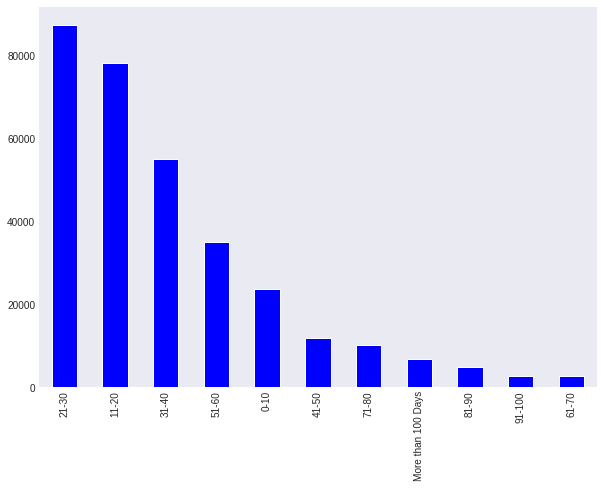

In [ ]:
plt.figure(figsize=(10,7))
train.Stay.value_counts().plot(kind="bar", color = ['blue'])

In [ ]:
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

# **DATA PREPROCESSING**

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
# Combining test and train dataset for processing
new_set = [train, test]

In [ ]:
from sklearn.preprocessing import LabelEncoder
for data in new_set:
    label = LabelEncoder()
    data['Department'] = label.fit_transform(data['Department'])

In [ ]:
for dataset in new_set:
    label = LabelEncoder()
    dataset['Hospital_type_code'] = label.fit_transform(dataset['Hospital_type_code'])
    dataset['Ward_Facility_Code'] = label.fit_transform(dataset['Ward_Facility_Code'])
    dataset['Ward_Type'] = label.fit_transform(dataset['Ward_Type'])
    dataset['Type of Admission'] = label.fit_transform(dataset['Type of Admission'])
    dataset['Severity of Illness'] = label.fit_transform(dataset['Severity of Illness'])

In [ ]:
new_set[0]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,Z,3,3,2,5,2.0,31397,7.0,0,0,2,51-60,4911.0,0-10
1,2,2,2,5,Z,2,3,3,5,2.0,31397,7.0,1,0,2,51-60,5954.0,41-50
2,3,10,4,1,X,2,1,3,4,2.0,31397,7.0,1,0,2,51-60,4745.0,31-40
3,4,26,1,2,Y,2,3,2,3,2.0,31397,7.0,1,0,2,51-60,7272.0,41-50
4,5,26,1,2,Y,2,3,3,3,2.0,31397,7.0,1,0,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,X,3,3,1,5,4.0,86499,23.0,0,2,3,41-50,4144.0,11-20
318434,318435,24,0,1,X,2,1,1,4,4.0,325,8.0,2,2,4,81-90,6699.0,31-40
318435,318436,7,0,4,X,3,2,2,5,4.0,125235,10.0,0,1,3,71-80,4235.0,11-20
318436,318437,11,1,2,Y,3,1,1,3,3.0,91081,8.0,1,1,5,11-20,3761.0,11-20


In [ ]:
new_set[1]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,2,3,Z,3,2,3,0,2.0,17006,2.0,0,2,2,71-80,3095.0
1,318440,29,0,4,X,2,2,3,5,2.0,17006,2.0,1,2,4,71-80,4018.0
2,318441,26,1,2,Y,3,2,1,3,4.0,17006,2.0,0,2,3,71-80,4492.0
3,318442,6,0,6,X,3,2,1,5,2.0,17006,2.0,1,2,3,71-80,4173.0
4,318443,28,1,11,X,2,2,2,5,2.0,17006,2.0,1,2,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,1,2,Y,4,1,1,3,3.0,41160,3.0,0,1,4,41-50,6313.0
137053,455492,25,4,1,X,2,3,2,4,4.0,30985,7.0,0,2,2,0-10,3510.0
137054,455493,30,2,3,Z,2,1,2,0,4.0,81811,12.0,2,1,2,0-10,7190.0
137055,455494,5,0,1,X,2,1,2,4,4.0,57021,10.0,1,1,2,41-50,5435.0


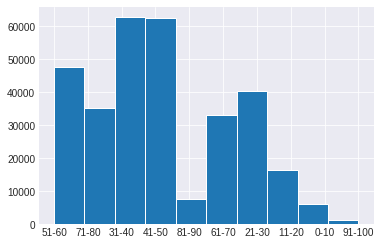

In [ ]:
new_set[0].Age.hist()

In [ ]:
new_set[0].Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [ ]:
age_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

In [ ]:
for dataset in new_set:
    dataset['Age'] = dataset['Age'].replace(age_dict.keys(), age_dict.values())

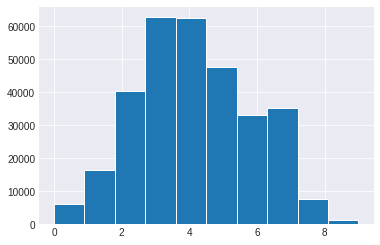

In [ ]:
new_set[0].Age.hist()

In [ ]:
new_set[0].Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [ ]:
stay_dict = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}

In [ ]:
new_set[0]['Stay'] = new_set[0]['Stay'].replace(stay_dict.keys(), stay_dict.values())

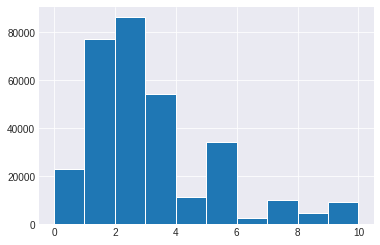

In [ ]:
new_set[0].Stay.hist()

In [ ]:
for data in new_set:
    print(data.shape)

(313793, 18)
(134865, 17)


In [ ]:
new_set[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            313793 non-null  int64  
 1   Hospital_code                      313793 non-null  int64  
 2   Hospital_type_code                 313793 non-null  int64  
 3   City_Code_Hospital                 313793 non-null  int64  
 4   Hospital_region_code               313793 non-null  object 
 5   Available Extra Rooms in Hospital  313793 non-null  int64  
 6   Department                         313793 non-null  int64  
 7   Ward_Type                          313793 non-null  int64  
 8   Ward_Facility_Code                 313793 non-null  int64  
 9   Bed Grade                          313793 non-null  float64
 10  patientid                          313793 non-null  int64  
 11  City_Code_Patient                  3137

In [ ]:
new_set[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134865 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            134865 non-null  int64  
 1   Hospital_code                      134865 non-null  int64  
 2   Hospital_type_code                 134865 non-null  int64  
 3   City_Code_Hospital                 134865 non-null  int64  
 4   Hospital_region_code               134865 non-null  object 
 5   Available Extra Rooms in Hospital  134865 non-null  int64  
 6   Department                         134865 non-null  int64  
 7   Ward_Type                          134865 non-null  int64  
 8   Ward_Facility_Code                 134865 non-null  int64  
 9   Bed Grade                          134865 non-null  float64
 10  patientid                          134865 non-null  int64  
 11  City_Code_Patient                  1348

In [ ]:
columns_list = ['Type of Admission', 'Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']
len(columns_list)

4

In [ ]:
from sklearn.preprocessing import StandardScaler
s1= StandardScaler()

for dataset in new_set:
    dataset[columns_list]= s1.fit_transform(dataset[columns_list].values)

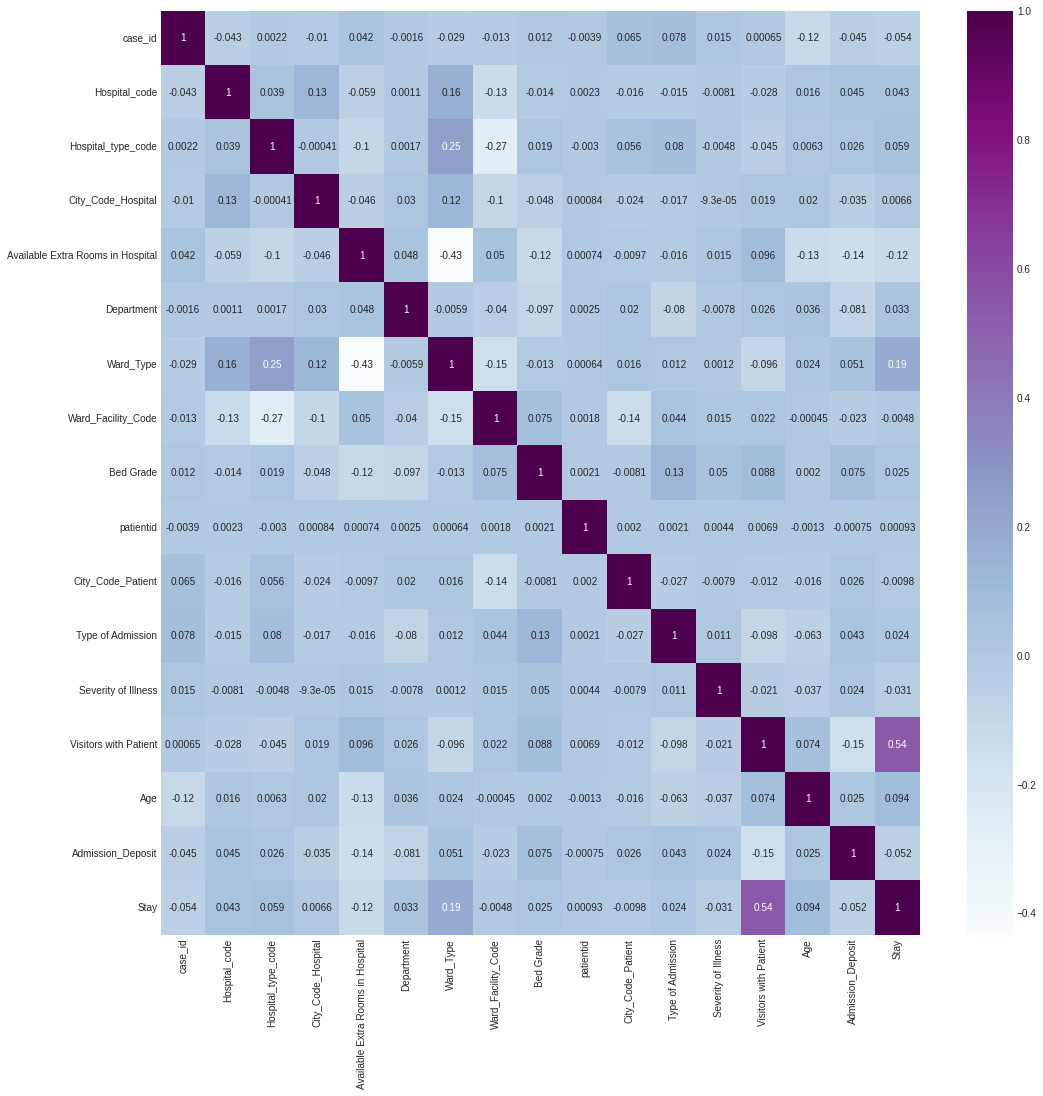

In [ ]:
plt.figure(figsize=(17,17))
sns.heatmap(new_set[0].corr(), annot=True, cmap='BuPu')

# **MODELLING THE DATA**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train = new_set[0]
test = new_set[1]

In [ ]:
sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [ ]:
X_train = train.drop(['case_id', 'Stay','Hospital_region_code'], axis=1)
Y_train = train["Stay"]
X_test  = test.drop(['case_id','Hospital_region_code'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((313793, 15), (313793,), (134865, 15))

In [ ]:
X_train = X_train.astype(int)
Y_train = Y_train.astype(int)
X_test = X_test.astype(int)

In [ ]:
sample.shape

(137057, 2)

In [ ]:
X_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient',
       'Type of Admission', 'Severity of Illness', 'Visitors with Patient',
       'Age', 'Admission_Deposit'],
      dtype='object')

In [ ]:
Y_train

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 313793, dtype: int64

In [ ]:
# Accuracy while using KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn_accuracy = round(knn.score(X_train, Y_train) * 100, 2)
print("Accuracy of KNN ")
knn_accuracy

Accuracy of KNN 


54.92

In [ ]:
# Accuracy while using Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy of Decision Tree ")
decision_tree_accuracy

Accuracy of Decision Tree 


99.64

In [ ]:
# Accuracy while using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy of Random Forest ")
acc_random_forest

Accuracy of Random Forest 


99.64

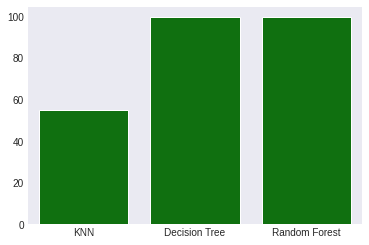

In [ ]:
sns.barplot(x= ['KNN','Decision Tree','Random Forest'],y= [knn_accuracy, decision_tree_accuracy, acc_random_forest],color = 'green')

# **RESULT - LOS Predicted Data**

In [ ]:
sample

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [ ]:
LOS_predicted = pd.DataFrame({
        "case_id": test["case_id"],
        "Stay": Y_pred
})

In [ ]:
LOS_predicted['Stay'] = LOS_predicted['Stay'].replace(stay_dict.values(), stay_dict.keys())

In [ ]:
LOS_predicted.to_csv('LOS.csv', index = False)

In [ ]:
LOS = pd.read_csv('/content/LOS.csv')
LOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134865 entries, 0 to 134864
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   case_id  134865 non-null  int64 
 1   Stay     134865 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
LOS.head(10)

,case_id,Stay
0,318439,21-30
1,318440,31-40
2,318441,21-30
3,318442,51-60
4,318443,21-30
5,318444,21-30
6,318445,21-30
7,318453,31-40
8,318454,21-30
9,318455,41-50


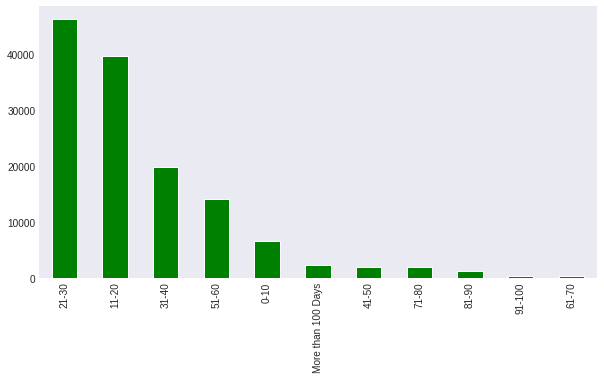

In [ ]:
plt.figure(figsize=(10,5))
LOS.Stay.value_counts().plot(kind="bar", color = ['green'])